In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.3)

In [2]:
import itertools as it
from collections import Counter, defaultdict, deque

In [94]:
from agents import *
from envs import *
from meta import *
from policies import *

d = Discrete((0, 1))
n = Normal(0, 1)
env = MouselabEnv(2, 2, reward=d, cost=-.1)

agent = Agent()
policy = AdvantageActorCritic(actor_lambda=1, critic_lambda=1)
agent.register(env)
agent.register(policy)
trace = agent.run_many(500)

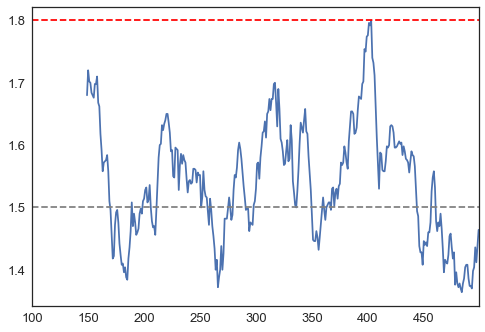

In [95]:
df = pd.DataFrame(trace)
df['return'].iloc[100:].rolling(50).mean().plot()
plt.axhline(1.8, c='r', ls='--')
plt.axhline(1.5, c='gray', ls='--')

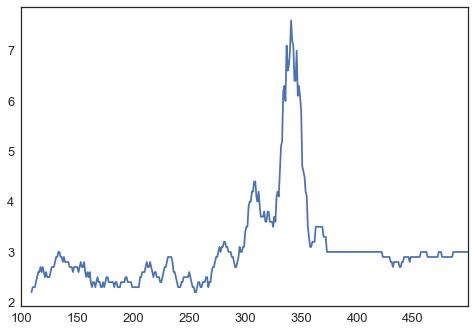

In [69]:
df['n_steps'].iloc[100:].rolling(10).mean().plot()

In [97]:
np.round([1.1235, 2.12345], 2)

array([ 1.12,  2.12])

In [112]:
print('{:<50}  {}'.format(str(np.random.rand(4)), 4))

[ 0.603  0.478  0.231  0.689]                       4


In [114]:
gp_minimize?

In [115]:
%%time

from agents import *
from envs import *
from meta import *
from policies import *

agent = Agent()
agent.register(env)

def loss(x):
    policy = AdvantageActorCritic(actor_lr=x[0], 
                                  critic_lr=x[1], 
                                  actor_lambda=x[2], 
                                  critic_lambda=x[3])
    agent.register(policy)
    trace = agent.run_many(2000, max_steps=500, pbar=False)
    avg = sum(trace['return'][-500:]) / 500
    print('{:<50}  {}'.format(str(np.round(x, 7)), avg))
    return -avg

from skopt import gp_minimize
space = [
    (1e-4, 1e-2, 'log-uniform'),
    (1e-4, 1e-2, 'log-uniform'),
    (0.5, 1.),
    (0.5, 1.),
]

gp = gp_minimize(loss, space, n_calls=300, random_state=0, n_jobs=4)

[ 0.001  0.003  0.801  0.772]                       1.5353999999999934
[  7.036e-04   1.958e-03   7.188e-01   9.459e-01]   1.574199999999996
[  8.459e-03   5.846e-04   8.959e-01   7.644e-01]   1.5021999999999998
[ 0.001  0.007  0.536  0.544]                       1.536999999999995
[  1.098e-04   4.626e-03   8.891e-01   9.350e-01]   1.2533999999999996
[ 0.009  0.004  0.731  0.89 ]                       1.6463999999999854
[  1.724e-04   1.905e-03   5.717e-01   9.723e-01]   1.4763999999999988
[  1.106e-03   6.750e-04   6.323e-01   8.871e-01]   1.6273999999999955
[ 0.001  0.001  0.509  0.809]                       1.5273999999999963
[ 0.002  0.002  0.972  0.841]                       1.5973999999999946
[  1.021e-04   1.000e-04   9.912e-01   1.000e+00]   1.2993999999999988
[  3.438e-03   4.703e-04   6.573e-01   9.477e-01]   1.5389999999999986
[ 0.01   0.01   0.703  0.949]                       1.6131999999999858
[  1.000e-02   1.000e-04   7.599e-01   5.000e-01]   1.486
[ 0.009  0.005  0.629

/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.5623999999999891
[ 0.003  0.01   0.98   0.719]                       1.6213999999999946
[ 0.005  0.01   1.     0.5  ]                       1.6601999999999926
[ 0.01   0.01   1.     0.993]                       1.6865999999999852


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    0.5 ]                           1.6137999999999915
[ 0.006  0.01   1.     0.823]                       1.6267999999999905


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    0.5 ]                           1.5719999999999863
[ 0.005  0.01   1.     1.   ]                       1.596599999999987
[ 0.005  0.01   1.     1.   ]                       1.5557999999999934


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    1.  ]                           1.5741999999999887
[ 0.005  0.01   0.5    0.5  ]                       1.6173999999999906
[ 0.002  0.01   0.93   0.826]                       1.5749999999999946
[ 0.006  0.01   1.     0.5  ]                       1.6379999999999875
[  5.632e-04   9.900e-03   7.617e-01   9.811e-01]   1.5963999999999956
[  6.850e-04   1.011e-04   7.957e-01   5.406e-01]   1.5553999999999992
[  4.204e-04   9.871e-03   7.259e-01   9.710e-01]   1.5901999999999963
[  3.975e-04   9.922e-03   9.103e-01   7.353e-01]   1.4839999999999978
[ 0.006  0.01   1.     0.5  ]                       1.6621999999999897
[ 0.002  0.01   0.699  0.749]                       1.5711999999999946
[  3.036e-03   1.003e-04   5.167e-01   9.254e-01]   1.55
[ 0.006  0.01   0.5    0.5  ]                       1.6407999999999867
[ 0.006  0.01   1.     0.5  ]                       1.5663999999999916
[ 0.006  0.01   0.5    1.   ]                       1.6267999999999896
[  4.940e-04   1.011

/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.5883999999999876
[ 0.003  0.01   0.836  0.913]                       1.5793999999999933
[ 0.006  0.01   1.     1.   ]                       1.58559999999999
[ 0.006  0.01   0.5    1.   ]                       1.6557999999999864
[ 0.006  0.01   0.5    1.   ]                       1.626399999999987
[ 0.006  0.01   0.5    1.   ]                       1.62019999999999
[  9.976e-03   1.153e-04   5.714e-01   6.318e-01]   1.444
[ 0.006  0.01   1.     1.   ]                       1.5675999999999926
[ 0.006  0.01   0.5    0.5  ]                       1.5859999999999896
[  3.317e-04   1.014e-04   7.624e-01   9.601e-01]   1.5599999999999934
[ 0.006  0.01   0.5    1.   ]                       1.6951999999999858
[ 0.006  0.01   0.5    1.   ]                       1.5689999999999955
[ 0.006  0.01   0.5    1.   ]                       1.6671999999999867
[ 0.006  0.01   0.5    1.   ]                       1.6817999999999869
[ 0.006  0.01   0.5    1

/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.5812000000000004
[ 0.006  0.01   0.5    1.   ]                       1.6915999999999882
[ 0.005  0.01   0.5    1.   ]                       1.6123999999999858
[ 0.005  0.01   0.5    1.   ]                       1.6109999999999869
[ 0.006  0.01   1.     1.   ]                       1.6303999999999905
[ 0.006  0.01   0.5    1.   ]                       1.6197999999999892
[ 0.006  0.01   1.     1.   ]                       1.6433999999999904
[ 0.006  0.01   1.     1.   ]                       1.5595999999999888
[ 0.006  0.01   0.5    1.   ]                       1.6145999999999872
[ 0.006  0.01   0.5    1.   ]                       1.6543999999999923
[  8.352e-04   8.954e-03   5.266e-01   9.945e-01]   1.624399999999997
[ 0.005  0.01   0.5    1.   ]                       1.5435999999999934


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6197999999999866
[  8.756e-04   1.046e-04   6.265e-01   9.928e-01]   1.5307999999999997
[ 0.007  0.01   0.5    1.   ]                       1.4873999999999952
[ 0.005  0.01   0.5    1.   ]                       1.613999999999987
[ 0.006  0.01   0.5    0.5  ]                       1.5435999999999885


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    1.  ]                           1.6545999999999859


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    1.  ]                           1.6047999999999851


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    1.  ]                           1.6459999999999857


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    1.  ]                           1.6877999999999878


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    1.  ]                           1.6177999999999855


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    1.  ]                           1.6211999999999904


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    1.  ]                           1.6521999999999903
[  8.442e-04   9.576e-03   6.451e-01   9.956e-01]   1.577199999999996


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    1.  ]                           1.5585999999999902


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6789999999999858


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6829999999999872


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.618999999999989


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6499999999999855


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6045999999999885


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           0.8543999999999922
[ 0.003  0.01   1.     1.   ]                       1.5715999999999897
[ 0.003  0.01   1.     0.5  ]                       1.6027999999999925
[ 0.003  0.01   1.     1.   ]                       1.632199999999992
[ 0.003  0.01   1.     1.   ]                       1.6017999999999917
[ 0.003  0.01   1.     0.5  ]                       1.5869999999999946
[ 0.003  0.01   0.5    1.   ]                       1.5919999999999952
[ 0.003  0.01   1.     1.   ]                       1.6191999999999918
[ 0.003  0.01   1.     1.   ]                       1.6265999999999903
[ 0.003  0.01   1.     0.5  ]                       1.6089999999999938


Process ForkPoolWorker-2143:
Process ForkPoolWorker-2142:
Process ForkPoolWorker-2145:
Process ForkPoolWorker-2144:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/miniconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/local/lib/miniconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/lib/miniconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/local/lib/miniconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/lib/miniconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/miniconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  

KeyboardInterrupt: 

In [116]:
gp

NameError: name 'gp' is not defined

In [52]:
def encode(state):
    return np.array([1. if not hasattr(x, 'sample') else 0.
                     for x in state])

env.reset()
env.step(3)
state = env._state
encode(state)

(Cat, Cat, Cat, 0, Cat, Cat, Cat)


array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.])